<a href="https://colab.research.google.com/github/thiviyan98/ThiviyanNanthakumarCE888/blob/master/Assignment_2/Ass2Data2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score , StratifiedKFold
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from collections import Counter 

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


##1.Import and Reading Dataset

In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/thiviyan98/ThiviyanNanthakumarCE888/master/Assignment1/Data/noshowappointments/KaggleV2-May-2016.csv', sep=',', quotechar='"')

### Printing and getting info for medical appointment Dataset

In [3]:
df

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No


In [4]:
df.info()
#checked if there is missing values from the coloumn
#110527 entries lot of data, 14 variable coloumns (features)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [5]:
#Double check if there is missing values
df.isnull().any().sum()>0

False

####Cleaning up the data

In [0]:
df.drop(df[df['Age']<0].index,inplace=True) #dropping wrong data any age below 0

In [7]:
#deleted some rows on the handicap section as the person who set it said its only true or false so the values that are gonna be kept is 0 or 1 however, the dataset has it from 0 to 4. in this case i dropped them.
df.Handcap.value_counts()

0    108285
1      2042
2       183
3        13
4         3
Name: Handcap, dtype: int64

In [0]:
df.drop(df[df.Handcap > 1].index, inplace=True)

In [0]:
df[["Gender"]]=df[["Gender"]].apply(LabelEncoder().fit_transform) # 0 is female 1 is male
#dropped these as they were type str and was not necessary

In [0]:
df[["Neighbourhood"]]=df[["Neighbourhood"]].apply(LabelEncoder().fit_transform) # neighbourhood has been changed to int to make it easy to analyse
#dropped these as they were type str and was not necessary

In [0]:
#dropping these features as they can not be used as they are formatted wrong.
df.drop(columns=['ScheduledDay','AppointmentDay'],inplace=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110327 entries, 0 to 110526
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   PatientId      110327 non-null  float64
 1   AppointmentID  110327 non-null  int64  
 2   Gender         110327 non-null  int64  
 3   Age            110327 non-null  int64  
 4   Neighbourhood  110327 non-null  int64  
 5   Scholarship    110327 non-null  int64  
 6   Hipertension   110327 non-null  int64  
 7   Diabetes       110327 non-null  int64  
 8   Alcoholism     110327 non-null  int64  
 9   Handcap        110327 non-null  int64  
 10  SMS_received   110327 non-null  int64  
 11  No-show        110327 non-null  object 
dtypes: float64(1), int64(10), object(1)
memory usage: 10.9+ MB


In [13]:
df.describe() ## shows eerything is cleaned up

,PatientId,AppointmentID,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.103270e+05,1.103270e+05,110327.000000,110327.000000,110327.000000,110327.000000,110327.000000,110327.000000,110327.000000,110327.000000,110327.000000
mean,1.475245e+14,5.675298e+06,0.349842,37.070753,41.726866,0.098281,0.196833,0.071605,0.030382,0.018509,0.321182
std,2.561388e+14,7.129883e+04,0.476922,23.098052,22.356232,0.297695,0.397607,0.257834,0.171638,0.134782,0.466932
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.174584e+12,5.640278e+06,0.000000,18.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.175389e+13,5.680567e+06,0.000000,37.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439381e+13,5.725508e+06,1.000000,55.000000,60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,1.000000,115.000000,80.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Changing the Target Class to Binary Representation

In [14]:
df['No-show'].value_counts()

No     88049
Yes    22278
Name: No-show, dtype: int64

In [15]:
# binary classification 1 is No Show and 0 is Show
df['No-show']=[1 if b== 'Yes' else 0 for b in df['No-show']]
df['No-show'].value_counts()

0    88049
1    22278
Name: No-show, dtype: int64

In [16]:
print(df)

           PatientId  AppointmentID  Gender  ...  Handcap  SMS_received  No-show
0       2.987250e+13        5642903       0  ...        0             0        0
1       5.589978e+14        5642503       1  ...        0             0        0
2       4.262962e+12        5642549       0  ...        0             0        0
3       8.679512e+11        5642828       0  ...        0             0        0
4       8.841186e+12        5642494       0  ...        0             0        0
...              ...            ...     ...  ...      ...           ...      ...
110522  2.572134e+12        5651768       0  ...        0             1        0
110523  3.596266e+12        5650093       0  ...        0             1        0
110524  1.557663e+13        5630692       0  ...        0             1        0
110525  9.213493e+13        5630323       0  ...        0             1        0
110526  3.775115e+14        5629448       0  ...        0             1        0

[110327 rows x 12 columns]


Preprocessing is not necessary for this dataset

###Checking the imbalance

###Bar Graph for distribution

The distributions shows how skewed these features are. 

In [0]:
#Function to plot bar chart
def barchart(title,label,data):
  plt.title(title,fontsize=14)
  sns.countplot(label,data=data)

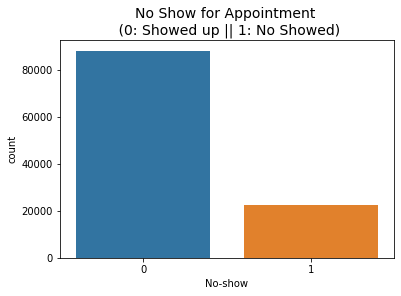

In [18]:
barchart('No Show for Appointment \n (0: Showed up || 1: No Showed)',"No-show",df)

In [19]:
recession= len(df[df['No-show']==1])
no_recession=len(df[df['No-show']==0])

percentofrecession= recession/(recession+no_recession)
percentofnorecession= no_recession/(recession+no_recession)

print("Percentage of Recession is", percentofrecession*100)
print("Percentage of No Recession is", percentofnorecession*100)

Percentage of Recession is 20.19269988307486
Percentage of No Recession is 79.80730011692513


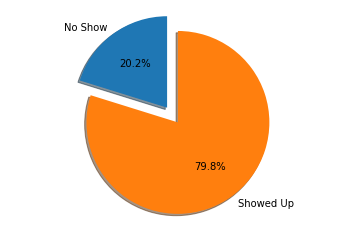

In [21]:
labels = 'No Show', 'Showed Up'

sizes=[percentofrecession,percentofnorecession]

explode=(0.2,0)

fig1, ax1 =plt.subplots()

ax1.pie(sizes,explode=explode,labels=labels,autopct='%1.1f%%', shadow= True, startangle=90)

ax1.axis('equal')

plt.show()

More people showed up then not showing up and this shows the medium imbalance of the dataset.

###Inspection of Dataset

In [0]:
#Function to produce pie chart
def piechart(x,y,title):
  value=df.groupby(x).sum()[y]
  value.plot.pie(figsize=(5,5),title=title)
  print(value)

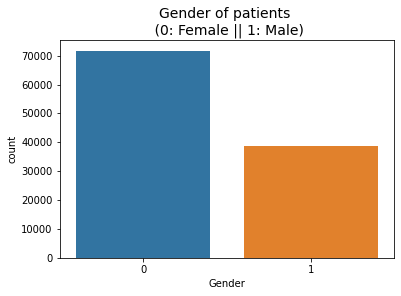

In [0]:
#Female to Male ratio of the dataset
barchart('Gender of patients \n (0: Female || 1: Male)',"Gender",df)

This graph shows that female patients were admitted more.

Gender
0    14568
1     7710
Name: No-show, dtype: int64


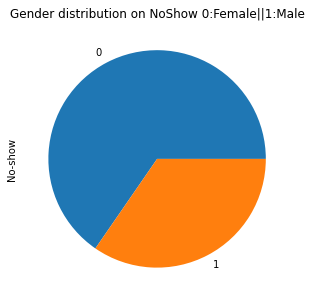

In [0]:
#Gender No Show relationship
piechart('Gender','No-show','Gender distribution on NoShow 0:Female||1:Male')

This shows the distribution of no shows by categorising by gender. Females have a higher distribution.

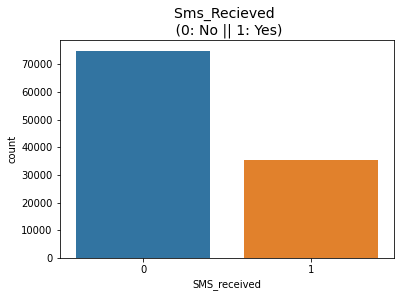

In [0]:
#Barchart of whether patients recieved sms reminder.
barchart('Sms_Recieved \n (0: No || 1: Yes)',"SMS_received",df)

This shows the whether the patients recieved an sms message or not and it shows that most did not.

SMS_received
0    12503
1     9775
Name: No-show, dtype: int64


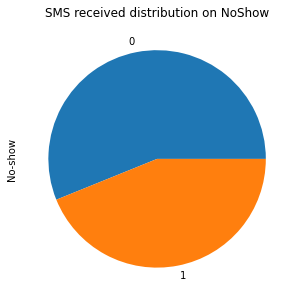

In [0]:
#SMS No Show ratio
piechart('SMS_received','No-show','SMS received distribution on NoShow')

This chart shows the number of people not showing up wehther they got a sms or not. This shows that people who did not recieve one missed the most appointments.

In [0]:
#Function for distribution graph.
def distchart(x,y,title):
  value=df.groupby(x).sum()[y]
  value.plot(kind='bar',figsize=(20,10),title=title)
  print(value)

Age
0      639
1      415
2      252
3      277
4      282
      ... 
98       1
99       0
100      0
102      0
115      3
Name: No-show, Length: 103, dtype: int64


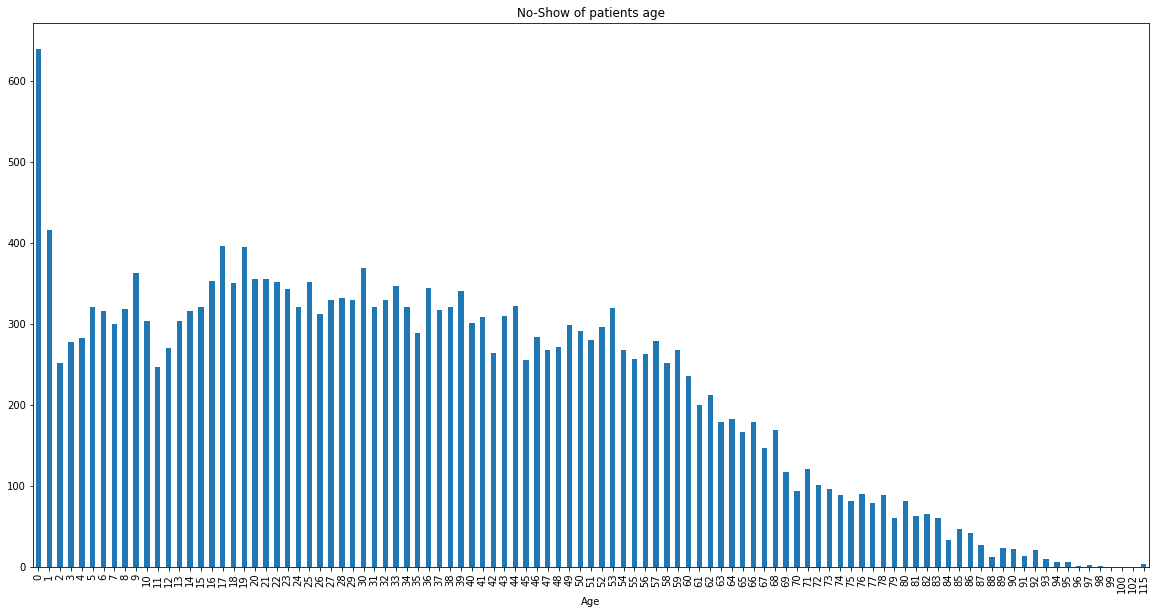

In [0]:
# distribution of the age of patients that did not turn up. 
distchart('Age','No-show','No-Show of patients age')

Neighbourhood
0       1
1     520
2      50
3      62
4      91
     ... 
76    426
77    512
78    573
79     32
80    141
Name: No-show, Length: 81, dtype: int64


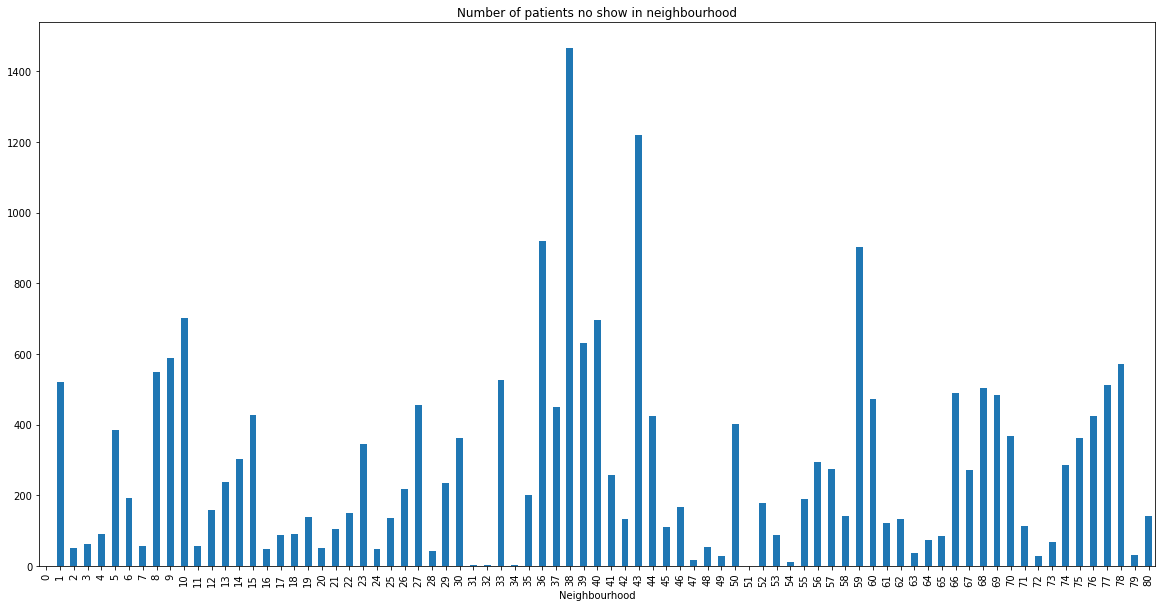

In [0]:
# number of no show patients in each hospital
distchart('Neighbourhood','No-show','Number of patients no show in neighbourhood')

Neghibourhood 38 has the most no show patients and neighbourhood 0 has everyone showing up. 

         Hipertension  Diabetes  Alcoholism  Handcap
No-show                                             
0               17968      6478        2677     1676
1                3748      1422         675      366


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


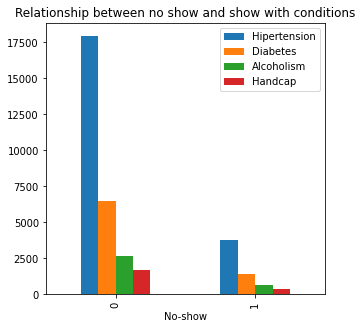

In [24]:
conditions=df.groupby('No-show')['Hipertension','Diabetes', 'Alcoholism','Handcap'].sum()
print(conditions)
conditions.plot(kind='bar',figsize=(5,5),title='Relationship between no show and show with conditions')

##2.To establish a baseline, perform cross-validation on your dataset using a decision tree and a random forest.

In [0]:
def boxplot(a,b,c,d):
  dfa=pd.DataFrame(a,columns=['Acc_scores'])
  dfa['Pre_scores']=b
  dfa['Rec_scores']=c
  dfa['F1_scores']=d
  plt.figure(6)
  boxplot = dfa.boxplot(column=['Acc_scores','Pre_scores','Rec_scores','F1_scores'])

In [0]:
#Function to establish a baseline and find average and accuracy 
def baseline(model,x,y):
  Acc_scores=cross_val_score(model,x,y,cv=10,scoring=make_scorer(accuracy_score)) #calculates accuracy 
  Pre_scores=cross_val_score(model,x,y,cv=10,scoring=make_scorer(precision_score)) #calculates precision
  Rec_scores=cross_val_score(model,x,y,cv=10,scoring=make_scorer(recall_score)) #calculates Recall
  F1_scores=cross_val_score(model,x,y,cv=10,scoring=make_scorer(f1_score)) #calculates F1
  print("Accuracy:", Acc_scores)
  print("Precision:", Pre_scores)
  print("Recall:", Rec_scores)
  print("F1 Score:", F1_scores)
  #Averages of the scores printed out
  print("Average Accuracy: %0.2f (+/- %0.2f)" % (Acc_scores.mean(), Acc_scores.std() * 2))
  print("Average Precision: %0.2f (+/- %0.2f)" % (Pre_scores.mean(), Pre_scores.std() * 2))
  print("Average Recall: %0.2f (+/- %0.2f)" % (Rec_scores.mean(), Rec_scores.std() * 2))
  print("Average F1 Score: %0.2f (+/- %0.2f)" % (F1_scores.mean(), F1_scores.std() * 2))
  boxplot(Acc_scores, Pre_scores,Rec_scores,F1_scores)

In [0]:
x = df[df.columns[:11]] ##Predictors

y=df['No-show'] ## Target variable

Accuracy: [0.66165141 0.69192423 0.67932566 0.68440134 0.67343424 0.65911357
 0.68485453 0.68718274 0.72180928 0.71836476]
Precision: [0.23287185 0.25634623 0.24513619 0.25276025 0.24337439 0.23264737
 0.22476862 0.25401929 0.27795359 0.27449974]
Recall: [0.29443447 0.27648115 0.28276481 0.28770197 0.29263914 0.29937163
 0.22890485 0.28378985 0.23664122 0.24012567]
F1 Score: [0.26005946 0.26603325 0.26260942 0.2691016  0.26574282 0.26182532
 0.22681788 0.26808059 0.2556391  0.25616471]
Average Accuracy: 0.69 (+/- 0.04)
Average Precision: 0.25 (+/- 0.03)
Average Recall: 0.27 (+/- 0.05)
Average F1 Score: 0.26 (+/- 0.02)


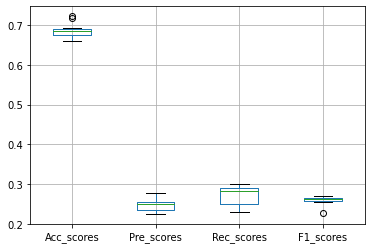

In [0]:
#Using the Decision Tree to perform cross validation
decclf = DecisionTreeClassifier(random_state=0)
baseline(decclf,x,y)

Accuracy: [0.77268195 0.78600562 0.7808393  0.78092994 0.77476661 0.75790809
 0.7832865  0.78725526 0.79505076 0.79224075]
Precision: [0.32198953 0.39323843 0.34301521 0.36065574 0.36439665 0.30281052
 0.3253493  0.37149028 0.43243243 0.4       ]
Recall: [0.11804309 0.0991921  0.11310592 0.09425494 0.12971275 0.14991023
 0.07675045 0.08127526 0.06331388 0.05475763]
F1 Score: [0.16270506 0.15878744 0.16926202 0.15568022 0.18295905 0.20006044
 0.11712707 0.12639405 0.10688836 0.09282031]
Average Accuracy: 0.78 (+/- 0.02)
Average Precision: 0.36 (+/- 0.08)
Average Recall: 0.10 (+/- 0.06)
Average F1 Score: 0.15 (+/- 0.07)


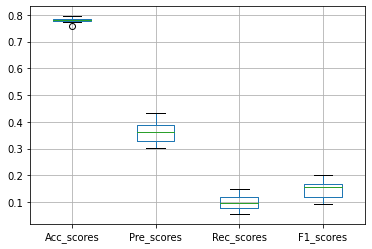

In [0]:
#Performing random forest classifier cross validation 
RFC=RandomForestClassifier()
baseline(RFC,x,y)

##3. Partition each of the datasets into 10 bins, keeping the imbalance ratio from the original dataset using stratified cross-validation 

###Performing Stratified CV Testin to see the iterations folds

In [0]:
skf = StratifiedKFold(n_splits=10,shuffle=False,random_state=None)
#enumerate the splits and summerise the distributions
for train_index, test_index in skf.split(x, y):
  #selects rows
  xtrain, xtest = x.iloc[train_index], x.iloc[test_index]
  ytrain, ytest = y.iloc[train_index], y.iloc[test_index]
  #summarising the train and test composition
  train_0, train_1 = len(ytrain[ytrain==0]), len(ytrain[ytrain==1])
  test_0, test_1 = len(ytest[ytest==0]), len(ytest[ytest==1])
  print('>Train: 0=%d, 1=%d, Test: 0=%d, 1=%d' % (train_0, train_1, test_0, test_1))
  print(xtrain.shape)
  print(xtest.shape)

>Train: 0=79244, 1=20050, Test: 0=8805, 1=2228
(99294, 11)
(11033, 11)
>Train: 0=79244, 1=20050, Test: 0=8805, 1=2228
(99294, 11)
(11033, 11)
>Train: 0=79244, 1=20050, Test: 0=8805, 1=2228
(99294, 11)
(11033, 11)
>Train: 0=79244, 1=20050, Test: 0=8805, 1=2228
(99294, 11)
(11033, 11)
>Train: 0=79244, 1=20050, Test: 0=8805, 1=2228
(99294, 11)
(11033, 11)
>Train: 0=79244, 1=20050, Test: 0=8805, 1=2228
(99294, 11)
(11033, 11)
>Train: 0=79244, 1=20050, Test: 0=8805, 1=2228
(99294, 11)
(11033, 11)
>Train: 0=79244, 1=20051, Test: 0=8805, 1=2227
(99295, 11)
(11032, 11)
>Train: 0=79244, 1=20051, Test: 0=8805, 1=2227
(99295, 11)
(11032, 11)
>Train: 0=79245, 1=20050, Test: 0=8804, 1=2228
(99295, 11)
(11032, 11)


###Checking Imbalance Ratio and Graph

####Training Data

Percentage of No Show is 20.19235611057959
Percentage of Show is 79.8076438894204


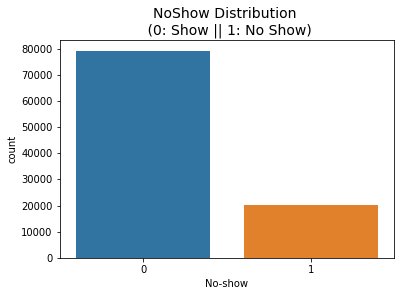

In [0]:
noshow= len(ytrain[ytrain==1])
show=len(ytrain[ytrain==0])

percentofnoshow= noshow/(noshow+show)
percentofshow= show/(noshow+show)

print("Percentage of No Show is", percentofnoshow*100)
print("Percentage of Show is", percentofshow*100)

barchart('NoShow Distribution \n (0: Show || 1: No Show)',ytrain,data=xtrain)

####Test Data

Percentage of No Show is 20.195794053662077
Percentage of Show is 79.80420594633793


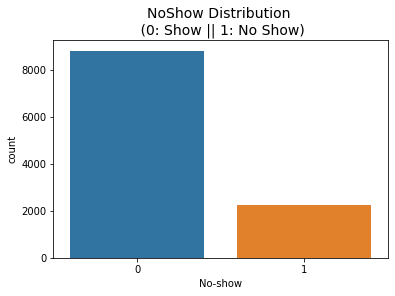

In [0]:
noshow= len(ytest[ytest==1])
show=len(ytest[ytest==0])

percentofnoshow= noshow/(noshow+show)
percentofshow= show/(noshow+show)

print("Percentage of No Show is", percentofnoshow*100)
print("Percentage of Show is", percentofshow*100)

barchart('NoShow Distribution \n (0: Show || 1: No Show)',ytest,data=xtest)

Both sets of training and test data have similar/same unbalanced ratio. Therefore, SKF has worked. Step has been completed. This will be appleid to the algorithm below for steps 4 to 8

##Steps 4 - 8

In [0]:
#Elbow method function
def elbow():
  Sum_of_squared_distances = []
  K = range(1,10)
  for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(xtrain)
    Sum_of_squared_distances.append(km.inertia_)
  plt.figure(1)
  plt.plot(K, Sum_of_squared_distances, 'bx-')
  plt.xlabel('k')
  plt.ylabel('Sum_of_squared_distances')
  plt.title('Elbow Method For Optimal k')
  plt.show()
  

In [0]:
def silhoutte():
  sil=[]
  k_sil= range(2,10)

  for k_s in k_sil:
    print(k_sil,end=' ')
    kmeans= KMeans(n_clusters=k_s)
    kmeans=kmeans.fit(xtrain)
    labels=kmeans.labels_
    sil.append(silhouette_score(xtrain,labels,metric='euclidean')) 
  plt.figure(2)
  plt.plot(k_sil,sil, 'bx-')
  plt.xlabel('k')
  plt.ylabel('silhouette_score')
  plt.title('Silhoutte Method for Optimal k')
  plt.show

               Start                  




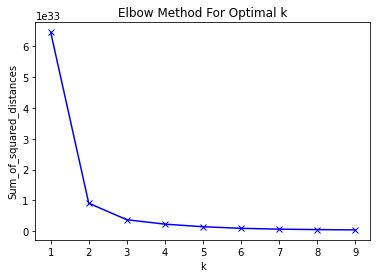

range(2, 10) range(2, 10) range(2, 10) range(2, 10) range(2, 10) range(2, 10) range(2, 10) range(2, 10) 

            ytrain Data             


Closest Clusters Train Labels 
 [0 0 0 ... 0 0 2]
centroids 
 [[3.20329201e+13 5.67821137e+06 3.41507470e-01 3.70496093e+01
  4.18276909e+01 1.00109128e-01 1.97747200e-01 7.23003399e-02
  2.71565295e-02 1.91538201e-02 3.22767583e-01]
 [8.06037869e+14 5.67885795e+06 3.50258347e-01 3.68809618e+01
  4.17241653e+01 9.45945946e-02 1.89884738e-01 7.39268680e-02
  3.13990461e-02 1.63950715e-02 3.08922893e-01]
 [4.09014255e+14 5.67847590e+06 3.47112654e-01 3.67296729e+01
  4.19151152e+01 9.79278426e-02 1.98695698e-01 7.23677290e-02
  2.35615862e-02 1.55674766e-02 3.24708110e-01]]


cluster center shape 
 (3, 11)




clusters 
 [0 2 1]


number of samples for each cluster 
 Counter({0: 79723, 1: 10064, 2: 9507})


            ytest Data              


Closest Clusters Test Labels 
 [0 2 0 ... 0 1 0]


Accuracy: [0.78532609 0.7509058  0.7817029  0.7824

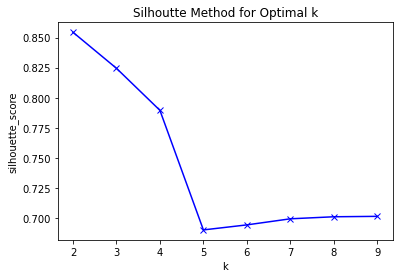

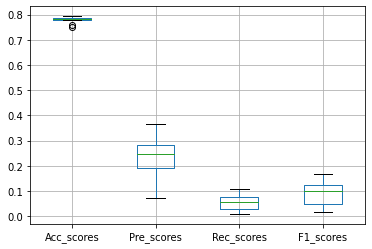

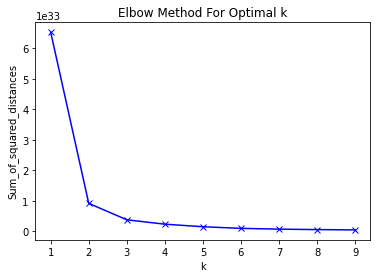

range(2, 10) range(2, 10) range(2, 10) range(2, 10) range(2, 10) range(2, 10) range(2, 10) range(2, 10) 

            ytrain Data             


Closest Clusters Train Labels 
 [1 0 1 ... 1 1 0]
centroids 
 [[4.08537455e+14 5.67663089e+06 3.53685543e-01 3.69866076e+01
  4.15380154e+01 9.78593272e-02 2.00780344e-01 7.30781398e-02
  2.46757355e-02 1.62395866e-02 3.29431614e-01]
 [3.21737192e+13 5.67653200e+06 3.50250619e-01 3.71444920e+01
  4.14877454e+01 1.00787659e-01 1.99314096e-01 7.20324611e-02
  2.93833147e-02 1.92078188e-02 3.24384759e-01]
 [8.07318593e+14 5.67703609e+06 3.59130094e-01 3.70737657e+01
  4.16966105e+01 9.33581505e-02 1.88577586e-01 7.18064263e-02
  3.80094044e-02 1.65556426e-02 3.07405956e-01]]


cluster center shape 
 (3, 11)




clusters 
 [1 0 2]


number of samples for each cluster 
 Counter({1: 79603, 2: 10208, 0: 9483})


            ytest Data              


Closest Clusters Test Labels 
 [1 1 1 ... 1 0 1]


Accuracy: [0.76902174 0.8134058  0.7817029  0.7642

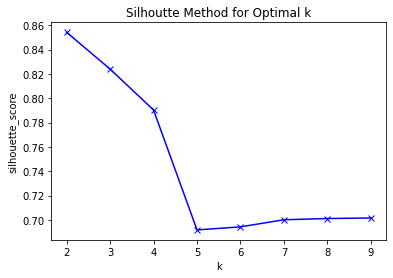

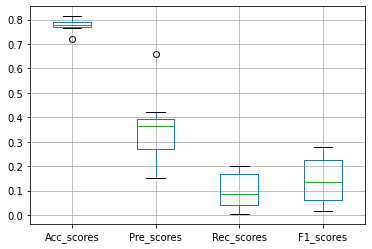

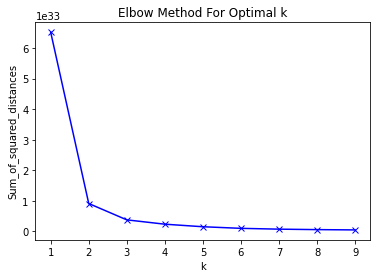

range(2, 10) range(2, 10) range(2, 10) range(2, 10) range(2, 10) range(2, 10) range(2, 10) range(2, 10) 

            ytrain Data             


Closest Clusters Train Labels 
 [0 2 0 ... 0 0 2]
centroids 
 [[3.19799943e+13 5.67722497e+06 3.49997489e-01 3.72518204e+01
  4.15647441e+01 9.78129865e-02 1.97772812e-01 7.24903329e-02
  3.02942801e-02 1.90955657e-02 3.23821122e-01]
 [8.06506195e+14 5.67787897e+06 3.62525657e-01 3.71544326e+01
  4.16389405e+01 9.13889160e-02 1.88055909e-01 7.11562897e-02
  3.78262144e-02 1.55410028e-02 3.08278761e-01]
 [4.08549335e+14 5.67713383e+06 3.54372543e-01 3.67971523e+01
  4.16862183e+01 9.57390288e-02 1.97853576e-01 7.28934226e-02
  2.27393476e-02 1.50887260e-02 3.29082988e-01]]


cluster center shape 
 (3, 11)




clusters 
 [0 2 1]


number of samples for each cluster 
 Counter({0: 79652, 1: 10231, 2: 9411})


            ytest Data              


Closest Clusters Test Labels 
 [0 2 0 ... 0 0 0]


Accuracy: [0.79528986 0.76358696 0.74456522 0.7824

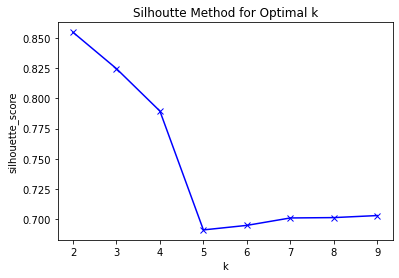

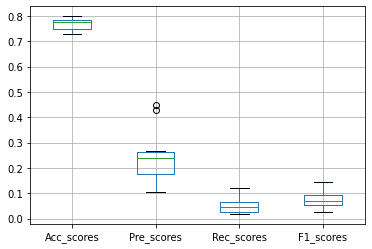

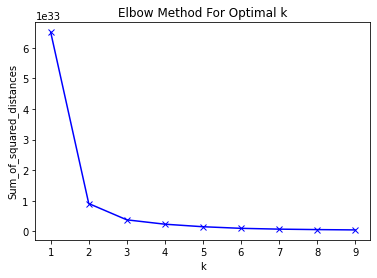

range(2, 10) range(2, 10) range(2, 10) range(2, 10) range(2, 10) range(2, 10) range(2, 10) range(2, 10) 

            ytrain Data             


Closest Clusters Train Labels 
 [2 0 2 ... 2 2 0]
centroids 
 [[4.09334041e+14 5.67662452e+06 3.52709883e-01 3.71116897e+01
  4.16442083e+01 9.36238045e-02 1.98193411e-01 7.31137088e-02
  2.39107333e-02 1.59404888e-02 3.31562168e-01]
 [8.06192405e+14 5.67725968e+06 3.58449946e-01 3.74235248e+01
  4.14515119e+01 8.98326646e-02 1.88178882e-01 7.35884137e-02
  3.84577747e-02 1.61463940e-02 3.08445053e-01]
 [3.20648399e+13 5.67688369e+06 3.48095148e-01 3.75023285e+01
  4.14046821e+01 9.67049520e-02 1.98933032e-01 7.16751396e-02
  3.06282558e-02 1.92179753e-02 3.26718132e-01]]


cluster center shape 
 (3, 11)




clusters 
 [2 0 1]


number of samples for each cluster 
 Counter({2: 79665, 1: 10219, 0: 9410})


            ytest Data              


Closest Clusters Test Labels 
 [2 2 2 ... 1 2 2]


Accuracy: [0.76721014 0.75271739 0.77445652 0.7597

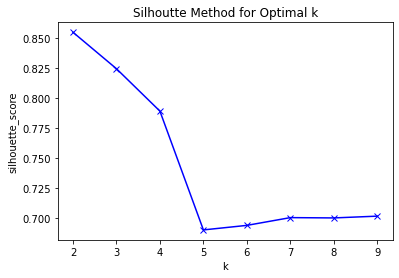

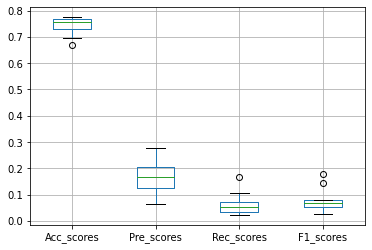

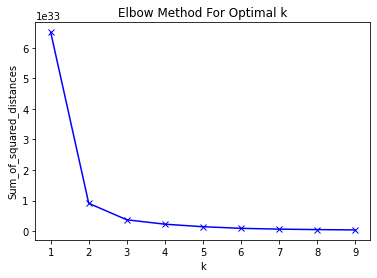

range(2, 10) range(2, 10) range(2, 10) range(2, 10) range(2, 10) range(2, 10) range(2, 10) range(2, 10) 

            ytrain Data             


Closest Clusters Train Labels 
 [1 0 1 ... 1 1 0]
centroids 
 [[4.08769973e+14 5.67710061e+06 3.48137989e-01 3.65299082e+01
  4.20337588e+01 9.73731406e-02 1.95379259e-01 7.20540141e-02
  2.45806520e-02 1.46639941e-02 3.33263002e-01]
 [3.19709725e+13 5.67752582e+06 3.47537772e-01 3.69437223e+01
  4.16995969e+01 1.00033910e-01 1.92896525e-01 7.02937593e-02
  3.15361139e-02 1.85750349e-02 3.25709908e-01]
 [8.06234645e+14 5.67778908e+06 3.56946625e-01 3.66983909e+01
  4.19840071e+01 9.22291994e-02 1.81613030e-01 7.06436421e-02
  3.89521193e-02 1.60910518e-02 3.09556515e-01]]


cluster center shape 
 (3, 11)




clusters 
 [1 0 2]


number of samples for each cluster 
 Counter({1: 79623, 2: 10192, 0: 9479})


            ytest Data              


Closest Clusters Test Labels 
 [0 1 0 ... 1 1 1]


Accuracy: [0.67481884 0.7490942  0.7182971  0.7688

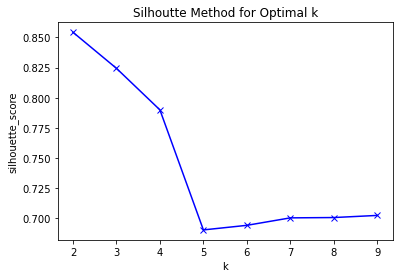

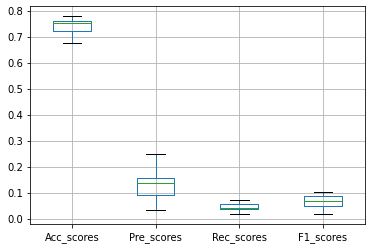

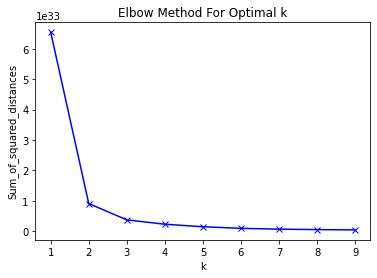

range(2, 10) range(2, 10) range(2, 10) range(2, 10) range(2, 10) range(2, 10) range(2, 10) range(2, 10) 

            ytrain Data             


Closest Clusters Train Labels 
 [1 2 1 ... 1 1 2]
centroids 
 [[8.07251943e+14 5.67860058e+06 3.61783067e-01 3.69268435e+01
  4.20640851e+01 9.18845103e-02 1.89231369e-01 7.23761217e-02
  4.06749902e-02 1.65821303e-02 3.09305501e-01]
 [3.20753259e+13 5.67821366e+06 3.49351285e-01 3.71575127e+01
  4.16600937e+01 9.88331931e-02 2.03079667e-01 7.23822203e-02
  3.13367412e-02 1.94049159e-02 3.27409287e-01]
 [4.09386712e+14 5.67822497e+06 3.50100817e-01 3.67455163e+01
  4.17604797e+01 9.80579433e-02 2.04711875e-01 7.46046907e-02
  2.56818423e-02 1.63429906e-02 3.34712936e-01]]


cluster center shape 
 (3, 11)




clusters 
 [1 2 0]


number of samples for each cluster 
 Counter({1: 79619, 0: 10252, 2: 9423})


            ytest Data              


Closest Clusters Test Labels 
 [1 1 1 ... 1 1 1]


Accuracy: [0.60326087 0.69112319 0.76902174 0.7252

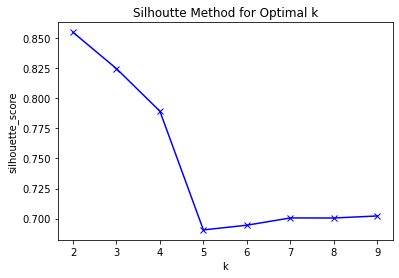

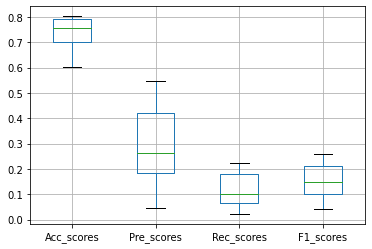

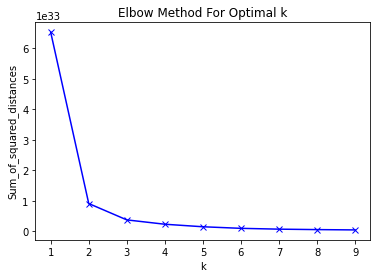

range(2, 10) range(2, 10) range(2, 10) range(2, 10) range(2, 10) range(2, 10) range(2, 10) range(2, 10) 

            ytrain Data             


Closest Clusters Train Labels 
 [0 1 0 ... 0 0 1]
centroids 
 [[3.19047735e+13 5.67722818e+06 3.49753138e-01 3.69005766e+01
  4.18613927e+01 1.00038945e-01 1.97841681e-01 7.07923466e-02
  3.10054146e-02 1.91836581e-02 3.33031822e-01]
 [4.08774129e+14 5.67680498e+06 3.56296296e-01 3.64350265e+01
  4.19896296e+01 9.78835979e-02 1.95449735e-01 7.08994709e-02
  2.48677249e-02 1.54497354e-02 3.39682540e-01]
 [8.06583171e+14 5.67771667e+06 3.59980478e-01 3.66344558e+01
  4.20406052e+01 9.14592484e-02 1.83796974e-01 7.11566618e-02
  3.95314788e-02 1.64958516e-02 3.14787701e-01]]


cluster center shape 
 (3, 11)




clusters 
 [0 1 2]


number of samples for each cluster 
 Counter({0: 79599, 2: 10245, 1: 9450})


            ytest Data              


Closest Clusters Test Labels 
 [2 0 0 ... 0 0 0]


Accuracy: [0.48913043 0.74184783 0.75724638 0.6971

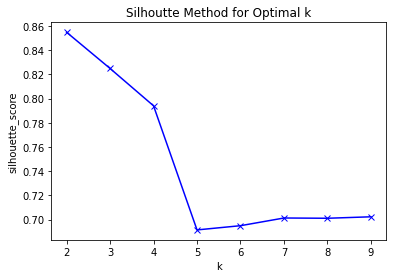

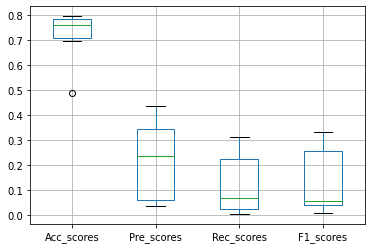

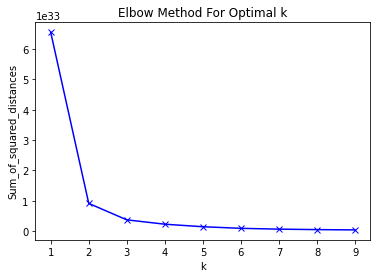

range(2, 10) range(2, 10) range(2, 10) range(2, 10) range(2, 10) range(2, 10) range(2, 10) range(2, 10) 

            ytrain Data             


Closest Clusters Train Labels 
 [0 1 0 ... 0 0 1]
centroids 
 [[3.21216501e+13 5.67346253e+06 3.50701781e-01 3.70850689e+01
  4.22719715e+01 9.99094476e-02 1.96284838e-01 7.01277795e-02
  3.05991548e-02 1.92172251e-02 3.20278700e-01]
 [4.08398481e+14 5.67317984e+06 3.52724595e-01 3.66935620e+01
  4.22520513e+01 9.79381443e-02 1.97875026e-01 7.14285714e-02
  2.34588681e-02 1.50431307e-02 3.26320219e-01]
 [8.06862816e+14 5.67460299e+06 3.62849080e-01 3.67087671e+01
  4.24386494e+01 9.28286465e-02 1.83905809e-01 7.10324025e-02
  3.81434271e-02 1.74175343e-02 2.99892965e-01]]


cluster center shape 
 (3, 11)




clusters 
 [0 1 2]


number of samples for each cluster 
 Counter({0: 79512, 2: 10277, 1: 9506})


            ytest Data              


Closest Clusters Test Labels 
 [2 2 0 ... 0 0 0]


Accuracy: [0.69746377 0.63315217 0.70081596 0.6826

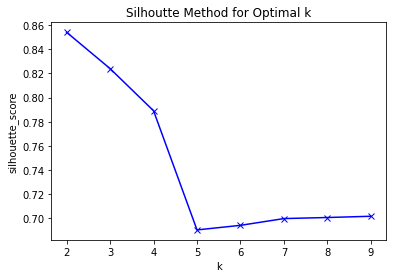

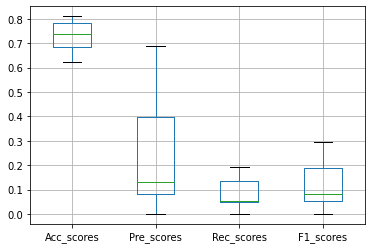

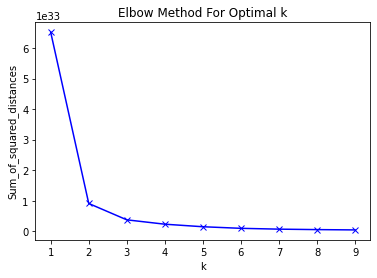

range(2, 10) range(2, 10) range(2, 10) range(2, 10) range(2, 10) range(2, 10) range(2, 10) 

In [0]:
#enumerate the splits and summerise the distributions
for train_index, test_index in skf.split(x, y):
  
  #selects rows
  xtrain, xtest = x.iloc[train_index], x.iloc[test_index]
  ytrain, ytest = y.iloc[train_index], y.iloc[test_index]
    
  #std_scaled=StandardScaler().fit(xtrain)
  #xtrain=std_scaled.transform(xtrain)
  #xtest=std_scaled.transform(xtest)

  print('               Start                  ')
  print('\n')
  #calling elbow and silhoutte method
  elbow()
  silhoutte()

  #after using elbow and silhouette number of clusters that have been decided is 2- 4  but 3 will be used for the train set.
  #run kmeans
  numk=3
  #model created using kmeans object and fitting kmeans object to dataset
  kmeans=KMeans(n_clusters=numk)
  kmeans = kmeans.fit(xtrain)

  y_train_clusters = kmeans.predict(xtrain)
  print('\n')
  print('            ytrain Data             ')
  print('\n')
  #Predict the closest cluster each sample in X belongs to.
  print('Closest Clusters Train Labels \n', y_train_clusters)
  

  #gets each clusters centroid points
  centroids=kmeans.cluster_centers_
  print('centroids \n', centroids)
  print('\n')
  #3 clusters
  print('cluster center shape \n',kmeans.cluster_centers_.shape)
  print('\n')
  
  #append the cluster labels into dataframe to visualise better
  df0=pd.DataFrame(data=xtrain)
  df0['clusters']=y_train_clusters
  
  #prints the clusters labels in lowest to highest order for each iteration
  print('\n')
  print('clusters \n',df0.clusters.unique())
  #prints out the number of samples of the minority class in that cluster
  print('\n')
  print('number of samples for each cluster \n', Counter(y_train_clusters))

  #Assigning xtest samples to its closest cluster
  y_test_clusters =  kmeans.predict(xtest)

  df1=pd.DataFrame(data=xtest)
  df1['clusters']=y_test_clusters

  print('\n')
  print('            ytest Data              ')
  print('\n')
  #Predict the closest cluster each sample in X belongs to.
  print('Closest Clusters Test Labels \n', y_test_clusters)
  RFC=RandomForestClassifier()
  print('\n')
  baseline(RFC,df1,ytest)
  print('\n')
